In [1]:
# 라이브러리 및 데이터 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('walmart_cleaned.csv')

In [3]:
df_sp=df[:15000]

In [4]:
df_sp

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,15034,2,2011-05-13,0,22.0,8196.89,74.61,3.899,0.0,0.0,0.0,0.0,0.0,215.612473,7.931,3,202307
14996,15035,2,2011-05-13,0,96.0,32012.70,74.61,3.899,0.0,0.0,0.0,0.0,0.0,215.612473,7.931,3,202307
14997,15036,2,2011-05-13,0,14.0,19521.67,74.61,3.899,0.0,0.0,0.0,0.0,0.0,215.612473,7.931,3,202307
14998,15037,2,2011-05-13,0,80.0,23778.91,74.61,3.899,0.0,0.0,0.0,0.0,0.0,215.612473,7.931,3,202307


## 정규분포로 바꿔주는 skleran 패키지
- power_transform
- 정규분포로 변환

---
- 정규분포로 변형
- 정규분포로 만들기 위해서는 해당 데이터의 분포가 왜도, 첨도를 보고 비대칭성을 확인
- 로그, 지수, 루트, 역수, 제곱 기타 정규분포화 만드는 방법

---
- 위의 패키지로 box-cox 변환, yeo-johnson 변환으로 바꿔 정규분포를 만들어 준다.

In [5]:
from sklearn.preprocessing import power_transform

In [6]:
# 위클리 세일즈 전처리

df_sp=df_sp[df_sp['Weekly_Sales']>0]

In [7]:
#여존슨 변환
df_sp[['yeo-johnson']]=power_transform(df_sp[['Weekly_Sales']], standardize=False)
#BOXcox 변환
df_sp[['box-cox']]=power_transform(df_sp[['Weekly_Sales']], method='box-cox',standardize=False)

### 데이터의 분포 확인

<Axes: xlabel='box-cox', ylabel='Density'>

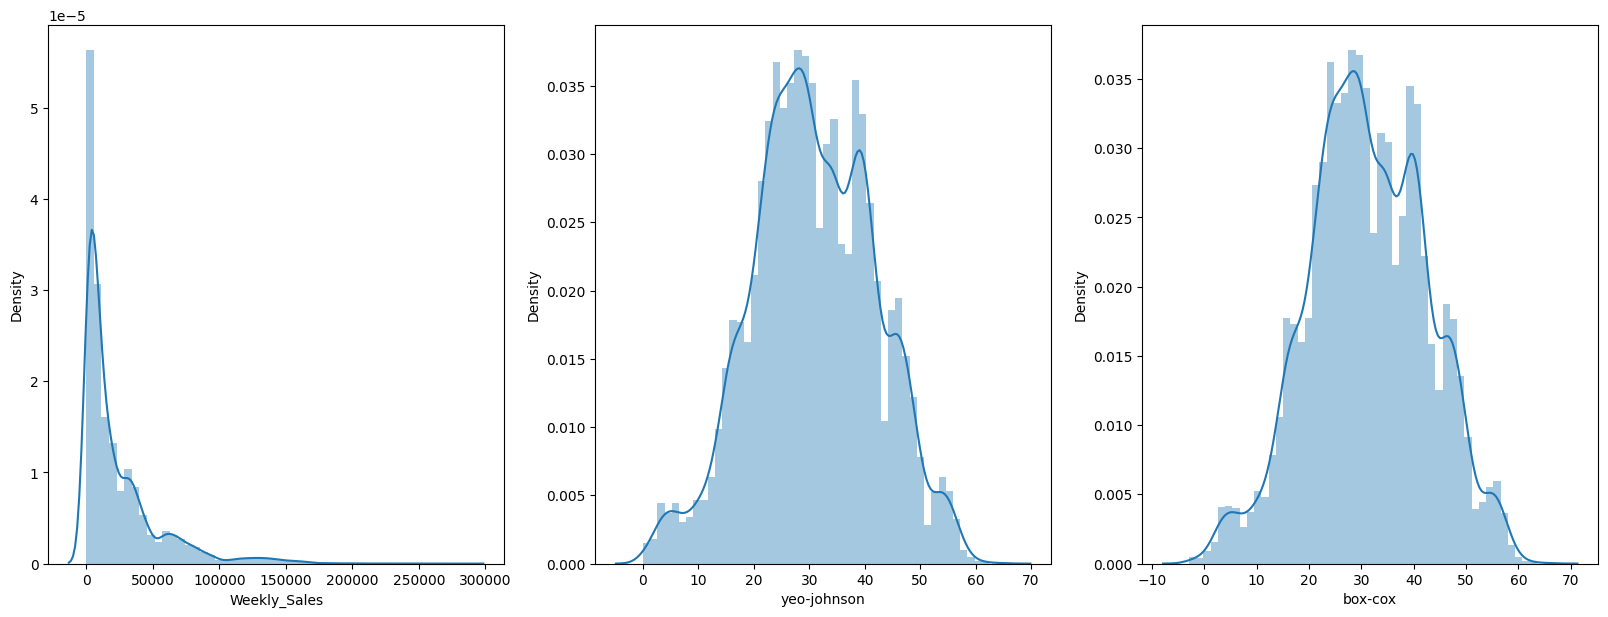

In [8]:
fig, axs = plt.subplots(ncols=3, figsize=(20,7))
sns.distplot(df_sp['Weekly_Sales'], ax= axs[0])
sns.distplot(df_sp['yeo-johnson'], ax= axs[1])
sns.distplot(df_sp['box-cox'], ax= axs[2])
#기존 데이터가 정규 분포를 가지는지, 그렇지 않다면 yeo-johnson과 box-cox를 적용했을 때 어떤 모양인지를 확인

# bike_sharing_daily 로 전처리 적용해 보기!

In [9]:
df = pd.read_csv('bike_sharing_daily.csv')

In [10]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796


In [14]:
df_bs= df[['casual','atemp','hum','registered','cnt']].dropna()
#casual이 변수 데이터, cnt가 target

In [12]:
df_bs_sp=df_bs[['casual','cnt']].dropna()

In [ ]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796


<Axes: xlabel='casual', ylabel='Density'>

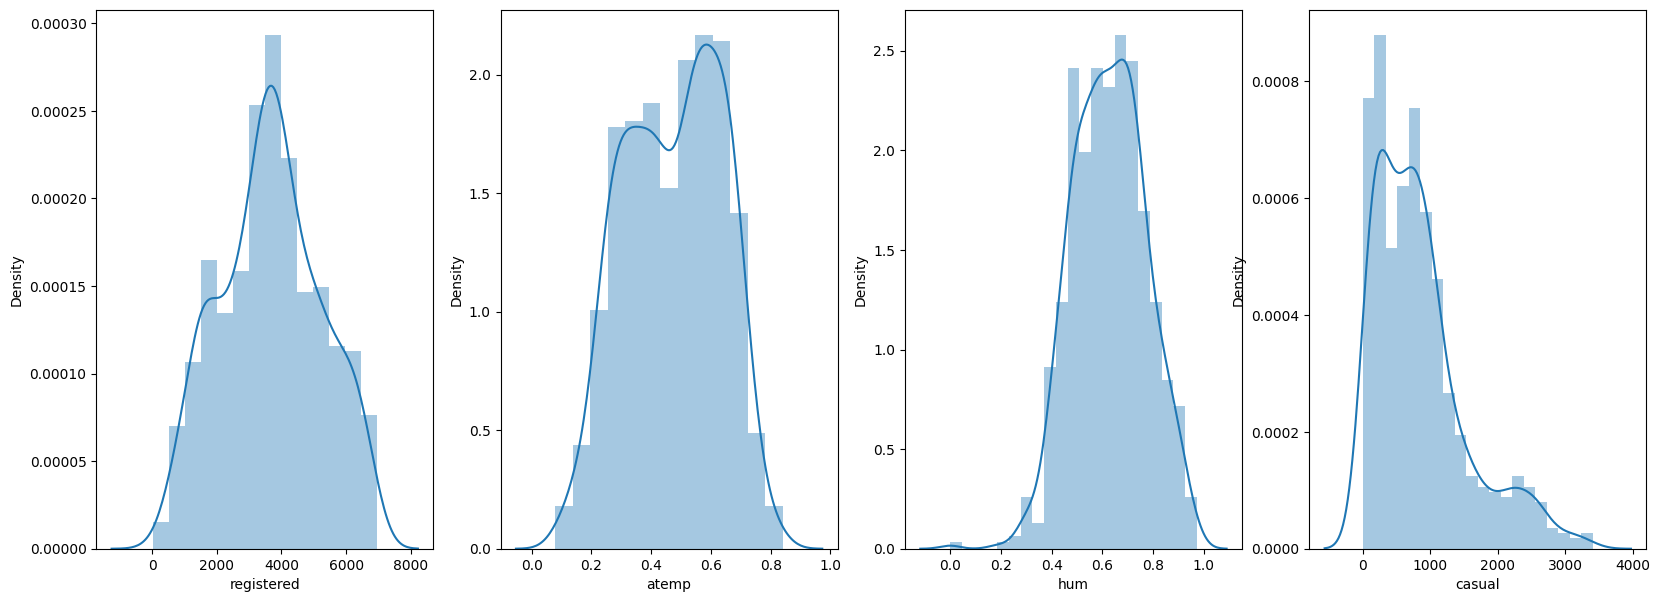

In [15]:
fig, axs = plt.subplots(ncols=4, figsize=(20,7))
sns.distplot(df_bs['registered'], ax= axs[0])
sns.distplot(df_bs['atemp'], ax= axs[1])
sns.distplot(df_bs['hum'], ax= axs[2])
sns.distplot(df_bs['casual'], ax= axs[3])


- casual변수가 정규분포인가?
- qqplot 그려보고, shapiro 검정 진행해 보기!

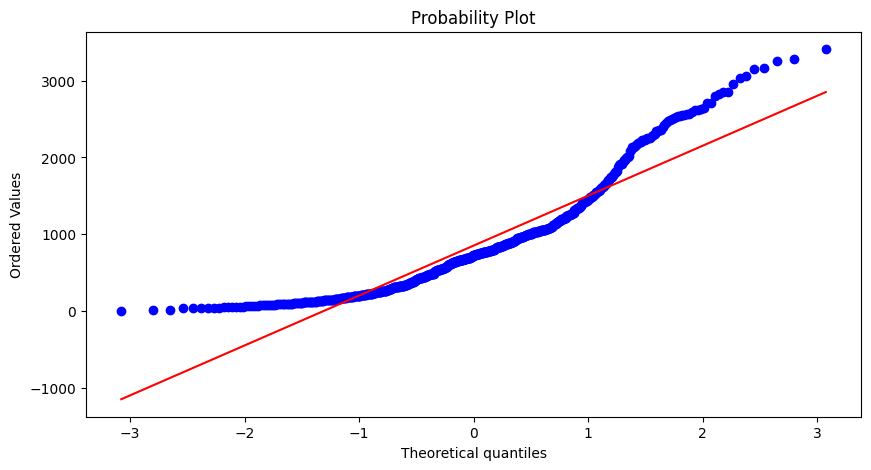

In [16]:
import scipy.stats as stats

plt.figure(figsize=(10,5))
stats.probplot(df_bs['casual'],dist = stats.norm, plot=plt)
plt.show()

# 생각보다 정규분포로 보이지 않음

In [17]:
# Shapiro 검정

from scipy.stats import shapiro
import numpy as np

stat, p =shapiro(df_bs_sp['casual'])

alpha = 0.05
if p>alpha:
    print('Fail to reject H0')
else:
    print('reject H0')

reject H0


## 정규분포로 변환

In [18]:
#여존슨 변환
df_bs_sp[['yeo-johnson']]=power_transform(df_bs_sp[['casual']], standardize=False)
#BOXcox 변환
df_bs_sp[['box-cox']]=power_transform(df_bs_sp[['casual']], method='box-cox',standardize=False)

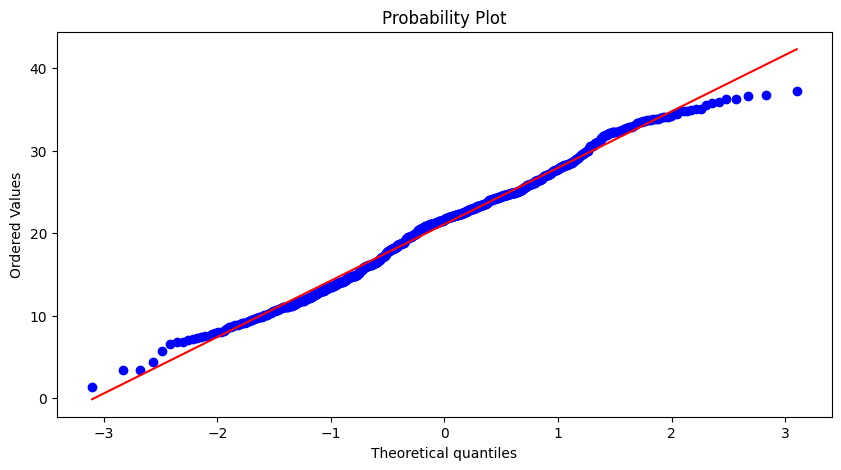

In [19]:
import scipy.stats as stats

plt.figure(figsize=(10,5))
stats.probplot(df_bs_sp['yeo-johnson'],dist = stats.norm, plot=plt)
plt.show()


In [20]:
# Shapiro 검정

from scipy.stats import shapiro
import numpy as np

stat, p =shapiro(df_bs_sp['yeo-johnson'])

alpha = 0.05
if p>alpha:
    print('Fail to reject H0')
else:
    print('reject H0')
#p가 alpha값 이하이므로 정규성을 띠지 못한다.

reject H0


In [ ]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796


<Axes: xlabel='temp', ylabel='Density'>

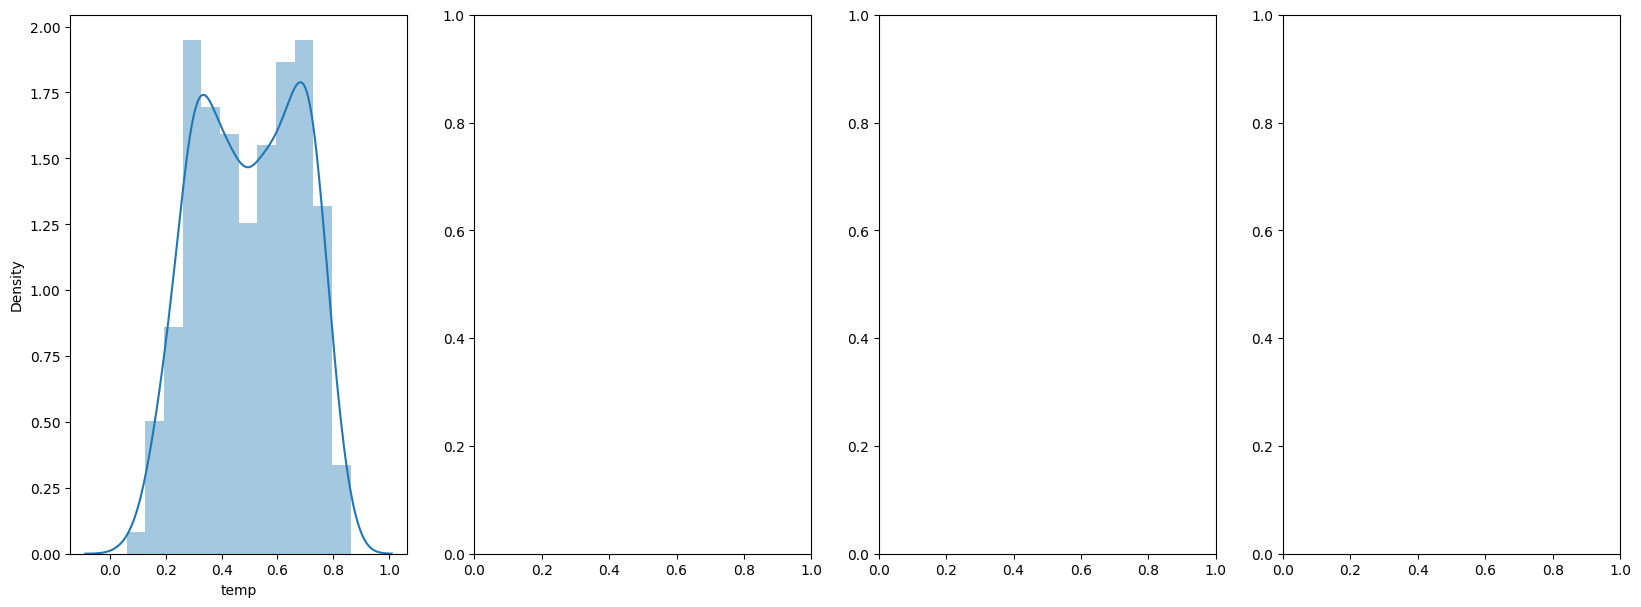

In [21]:
fig, axs = plt.subplots(ncols=4, figsize=(20,7))
sns.distplot(df['temp'], ax= axs[0])
#sns.distplot(df_bs_sp['yeo-johnson'], ax= axs[1])

- 간단한 선형회귀를 통해서 실제 정규분포로 변환했을 때 rmse 값 자체의 변화나 R2 변화가 있는지
- 잔차에 대한 변화와 결정계수에 대한 변화

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

In [23]:
df_bs_2x=df[['casual','hum','cnt']].dropna()

In [24]:
df_bs_2x

,casual,hum,cnt
0,331.0,0.805833,985
1,131.0,0.696087,801
2,120.0,0.437273,1349
3,108.0,0.590435,1562
4,82.0,0.436957,1600
...,...,...,...
726,247.0,0.652917,2114
727,644.0,0.590000,3095
728,159.0,0.752917,1341
729,364.0,0.483333,1796


In [25]:
## X_feature df_bs ['casual']
## Y = df_bs['cnt']
df_X = np.array(df_bs_2x[['casual','hum']]) #X 피처를 따로 빼고 numpy arrapy로 변환
# 기존에 있는 것에 변수를 하나 더 추가

X_train, X_test, y_train, y_test = train_test_split(df_X, df_bs_2x['cnt'], test_size=0.3, random_state=111)

In [26]:
model =LinearRegression() # 선형회귀 모델 불러오기

In [27]:
model.fit(X_train, y_train)#선형회귀 모델 학습
y_pred = model.predict(X_test)# X_test로 예측값 추출

- base RMSE(1472), R2
- COrr 0.674468

In [28]:
rmse = sqrt(mean_squared_error(y_test, y_pred))

In [29]:
rmse

1419.2650130335728

In [30]:
X = sm.add_constant(df_X)
model_ols = sm.OLS(df_bs['cnt'], df_bs['casual']).fit()
summary = model_ols.summary()

In [31]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.776
Model:                            OLS   Adj. R-squared (uncentered):              0.775
Method:                 Least Squares   F-statistic:                              2287.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):                   9.26e-217
Time:                        07:13:43   Log-Likelihood:                         -6072.5
No. Observations:                 662   AIC:                                  1.215e+04
Df Residuals:                     661   BIC:                                  1.215e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
casual         3.9625      0.083     47.818      0.000       3.800       4.125
==============================================================================
Omnibus:                       91.006   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.948
Skew:                          -1.005   Prob(JB):                     2.71e-28
Kurtosis:                       3.747   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
df_bs.corr()

,casual,atemp,hum,registered,cnt
casual,1.000000,0.540500,-0.082085,0.393183,0.672770
atemp,0.540500,1.000000,0.152576,0.547873,0.633229
hum,-0.082085,0.152576,1.000000,-0.084020,-0.096108
registered,0.393183,0.547873,-0.084020,1.000000,0.944676
cnt,0.672770,0.633229,-0.096108,0.944676,1.000000


### 정규분포로 변환한 경우 회귀분석을 통한 확인

In [33]:
df_X = np.array(df_bs_sp['yeo-johnson']).reshape(-1,1)  #X 피처를 따로 빼고 numpy arrapy로 변환

X_train, X_test, y_train, y_test = train_test_split(df_X, df_bs_sp['cnt'], test_size=0.3, random_state=111)

In [34]:
df_X

array([[16.36548663],
       [11.47833622],
       [11.0856752 ],
       [10.62818672],
       [ 9.50227692],
       [ 9.7816125 ],
       [12.04305492],
       [ 8.79157859],
       [ 7.97323439],
       [ 7.0724174 ],
       [ 7.22246957],
       [ 5.64587554],
       [ 6.83782346],
       [ 7.97323439],
       [14.08381597],
       [14.754922  ],
       [10.97434198],
       [ 3.3664359 ],
       [ 9.3082343 ],
       [ 9.54977741],
       [ 9.15821451],
       [10.0046439 ],
       [12.10652098],
       [ 9.68998241],
       [13.16115604],
       [ 6.50484458],
       [ 4.40313345],
       [ 6.83782346],
       [11.1951235 ],
       [11.78315839],
       [ 7.14804429],
       [ 7.50903039],
       [ 9.00405946],
       [ 8.39835008],
       [ 9.7816125 ],
       [10.30355721],
       [16.77809813],
       [11.0856752 ],
       [ 8.57043729],
       [ 7.90951143],
       [ 7.50903039],
       [12.07486079],
       [15.53792918],
       [17.50258269],
       [13.73813681],
       [11

In [35]:
model =LinearRegression() # 선형회귀 모델 불러오기

In [36]:
model.fit(X_train, y_train)#선형회귀 모델 학습
y_pred = model.predict(X_test)# X_test로 예측값 추출

In [37]:
rmse = sqrt(mean_squared_error(y_test, y_pred))

In [38]:
rmse

1286.0545832762296

In [39]:
df_bs_sp.corr()

,casual,cnt,yeo-johnson,box-cox
casual,1.000000,0.674468,0.939134,0.939241
cnt,0.674468,1.000000,0.760241,0.760145
yeo-johnson,0.939134,0.760241,1.000000,0.999997
box-cox,0.939241,0.760145,0.999997,1.000000


In [40]:
X = sm.add_constant(df_X)
model_ols1 = sm.OLS(df_bs_sp['cnt'], df_bs_sp['yeo-johnson']).fit()
summary1 = model_ols1.summary()

In [41]:
summary1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                          1.017e+04
Date:                Fri, 08 Mar 2024   Prob (F-statistic):                        0.00
Time:                        07:13:53   Log-Likelihood:                         -6161.0
No. Observations:                 720   AIC:                                  1.232e+04
Df Residuals:                     719   BIC:                                  1.233e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yeo-johnson   213.7706      2.120    100.850      0.000     209.609     217.932
==============================================================================
Omnibus:                       22.302   Durbin-Watson:                   0.539
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.439
Skew:                           0.081   Prob(JB):                      0.00328
Kurtosis:                       2.404   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.776
Model:                            OLS   Adj. R-squared (uncentered):              0.775
Method:                 Least Squares   F-statistic:                              2287.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):                   9.26e-217
Time:                        07:13:43   Log-Likelihood:                         -6072.5
No. Observations:                 662   AIC:                                  1.215e+04
Df Residuals:                     661   BIC:                                  1.215e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
casual         3.9625      0.083     47.818      0.000       3.800       4.125
==============================================================================
Omnibus:                       91.006   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.948
Skew:                          -1.005   Prob(JB):                     2.71e-28
Kurtosis:                       3.747   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 필수과제1
- 정규분포와 비슷한 컬럼을 추가하여
- 기존 데이터 df casual, cnt ,[정규분포와 비슷한 추가컬럼] 을 통해서 - r2, rmse, 확인해 주세요.
- 정규분포와 비슷하지 않은 컬럼 추가하여
- 기존 데이터 df casual, cnt ,[정규분포와 비슷하지 않은 추가컬럼] 을 통해서 - r2, rmse, 확인해 주세요.
----
## 필수과제2
- 정규분포와 비슷하지 않은 컬럼 추가하여
- 기존 데이터 df casual, cnt ,[정규분포와 비슷하지 않은 추가컬럼을 box-cox 등으로 변환] 을 통해서 - r2, rmse, 확인해 주세요.
- 해당 컬럼을 box-cox, yeo-johnson을 통해 변환하고 실제 값을 계산해 주세요.

## 우리가 확인하고 싶은 것은?
- 정규분포를 가정하는 모델에서 변수를 정규분포화로 만들어준다면 실제 모델의 성능이 올라가는지의 유무를 확인하는 것!